# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [90]:
# Dependencies
import csv
import time
import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats,lngs)

## Generate Cities List

In [91]:
#city
cities=[]
for lat_lang in lat_lngs:
    city = citipy.nearest_city(lat_lang[0],lat_lang[1]).city_name
    if city not in cities:
        cities.append(city)
    
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [92]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


#decided not to use the dictionary and creating 9 empty lists and appending to the dict. 
#I read a values from api call into a list and saved it into csv file.
#weather_dict = dict()
row=[]
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i=0
headers=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
with open(output_data_file, 'w') as csvfile:
    weather_writer = csv.writer(csvfile)
    weather_writer.writerow(headers)
    for city in cities:
        try:
            response = requests.get(query_url + city).json()
            row.append(city)
            row.append(response['coord']['lat'])
            row.append(response['coord']['lon'])
            row.append(response['main']['temp_max'])
            row.append(response['main']['humidity'])
            row.append(response['clouds']['all'])
            row.append(response['wind']['speed'])
            row.append(response['sys']['country'])
            row.append(response['dt'])
            weather_writer.writerow(row)           
            row.clear()
#I assumed when you city id it wsa id number I found in response
            print(f' Processing weather for {city} and the number {response["id"]}:{i}-{response["name"]}')
            i+=1
            if i%50 == 0:
                time.sleep(40)          
        except:
            print('No data for city {city}')  

 Processing weather for provideniya and the number 4031574:0-Provideniya
 Processing weather for rikitea and the number 4030556:1-Rikitea
 Processing weather for souillac and the number 933995:2-Souillac
 Processing weather for puerto ayora and the number 3652764:3-Puerto Ayora
 Processing weather for atuona and the number 4020109:4-Atuona
 Processing weather for luderitz and the number 3355672:5-Lüderitz
 Processing weather for tuatapere and the number 2180815:6-Tuatapere
 Processing weather for ushuaia and the number 3833367:7-Ushuaia
 Processing weather for caravelas and the number 3466980:8-Caravelas
 Processing weather for port elizabeth and the number 964420:9-Port Elizabeth
No data for city {city}
 Processing weather for bubaque and the number 2374583:10-Bubaque
 Processing weather for avarua and the number 4035715:11-Avarua
 Processing weather for arraial do cabo and the number 3471451:12-Arraial do Cabo
 Processing weather for butaritari and the number 2110227:13-Butaritari
 P

 Processing weather for thompson and the number 6165406:115-Thompson
 Processing weather for saquarema and the number 3448011:116-Saquarema
 Processing weather for springdale and the number 4132093:117-Springdale
 Processing weather for clyde river and the number 5924351:118-Clyde River
 Processing weather for bonga and the number 341742:119-Bonga
 Processing weather for lebu and the number 3883457:120-Lebu
 Processing weather for asau and the number 686090:121-Asău
 Processing weather for lhokseumawe and the number 1214658:122-Lhokseumawe
 Processing weather for paamiut and the number 3421193:123-Paamiut
 Processing weather for caxito and the number 2242001:124-Caxito
 Processing weather for apodi and the number 3407440:125-Apodi
 Processing weather for dikson and the number 1507390:126-Dikson
 Processing weather for tecpan and the number 3588476:127-Tecpan
 Processing weather for vanavara and the number 2013727:128-Vanavara
 Processing weather for sangar and the number 2017215:129-Sa

 Processing weather for kahului and the number 5847411:233-Kahului
 Processing weather for tokur and the number 2015217:234-Tokur
 Processing weather for sitangkai and the number 1686004:235-Venice of the Philippines
 Processing weather for astoria and the number 5711847:236-Astoria
No data for city {city}
No data for city {city}
 Processing weather for ust-barguzin and the number 2013986:237-Ust'-Barguzin
 Processing weather for doka and the number 376332:238-Doka
 Processing weather for balykshi and the number 610445:239-Balyqshy
 Processing weather for babynino and the number 579838:240-Babynino
 Processing weather for kimbe and the number 2093967:241-Kimbe
 Processing weather for keetmanshoop and the number 3356264:242-Keetmanshoop
 Processing weather for fort nelson and the number 5955902:243-Fort Nelson
 Processing weather for kieta and the number 2094027:244-Kieta
 Processing weather for iqaluit and the number 5983720:245-Iqaluit
 Processing weather for krasnomayskiy and the num

No data for city {city}
 Processing weather for denpasar and the number 1645528:349-Denpasar
 Processing weather for sarakhs and the number 1159716:350-Sarakhs
 Processing weather for klyuchi and the number 1503153:351-Klyuchi
 Processing weather for pisco and the number 3932145:352-Pisco
 Processing weather for mitocu dragomirnei and the number 673050:353-Mitocu Dragomirnei
 Processing weather for gornyak and the number 1506260:354-Gornyak
 Processing weather for huarmey and the number 3939168:355-Huarmey
 Processing weather for rivera and the number 3440781:356-Rivera
 Processing weather for san angelo and the number 5530022:357-San Angelo
 Processing weather for koshurnikovo and the number 1502389:358-Koshurnikovo
No data for city {city}
 Processing weather for mecca and the number 104515:359-Makkah al Mukarramah
 Processing weather for mvangue and the number 2225703:360-Mvangué
 Processing weather for prince rupert and the number 6113406:361-Prince Rupert
 Processing weather for kr

 Processing weather for visby and the number 2662689:462-Visby
 Processing weather for road town and the number 3577430:463-Road Town
 Processing weather for celestun and the number 3531368:464-Celestún
 Processing weather for bralostita and the number 683893:465-Braloştiţa
 Processing weather for lyubim and the number 532600:466-Lyubim
 Processing weather for udachnyy and the number 2014624:467-Udachny
 Processing weather for sao joao da barra and the number 3448903:468-São João da Barra
 Processing weather for west bay and the number 3580477:469-West Bay
 Processing weather for marystown and the number 6067472:470-Marystown
 Processing weather for koulikoro and the number 2454532:471-Koulikoro
 Processing weather for husavik and the number 2629833:472-Husavik
 Processing weather for ewa beach and the number 5855051:473-‘Ewa Beach
 Processing weather for corralillo and the number 3563317:474-Corralillo
 Processing weather for saint-georges and the number 3579925:475-St. George's
 Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
weather_data = pd.read_csv(output_data_file)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,24.69,88,90,7.78,RU,1604100700
1,Rikitea,-23.12,-134.97,76.21,64,0,3.87,PF,1604100979
2,Souillac,-20.52,57.52,68.00,56,40,17.22,MU,1604100979
3,Puerto Ayora,-0.74,-90.35,70.00,93,66,4.00,EC,1604100979
4,Atuona,-9.80,-139.03,77.92,73,76,10.51,PF,1604100693


In [94]:
cleaned_weather_data = weather_data.dropna(how="any")
cleaned_weather_data.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [95]:
cleaned_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.028125,19.397004,57.866746,73.867647,54.428309,7.929136,1.604101e+09
std,32.819628,91.802596,21.614098,19.013346,38.199129,5.893339,1.652373e+02
min,-54.800000,-179.170000,-12.240000,11.000000,0.000000,0.290000,1.604101e+09
25%,-8.597500,-65.187500,42.800000,64.000000,19.500000,3.717500,1.604101e+09
50%,21.375000,27.440000,63.545000,78.000000,65.500000,6.495000,1.604101e+09
75%,47.095000,100.342500,76.045000,87.000000,90.000000,10.592500,1.604101e+09
max,78.220000,179.320000,88.900000,100.000000,100.000000,39.150000,1.604101e+09


In [96]:
#Save cleaned data
cleaned_weather_data.to_csv(output_data_file)

In [97]:
#  Get the indices of cities that have humidity over 100%.
greater_than_100_humidity_idx = cleaned_weather_data.loc[cleaned_weather_data['Humidity'] > 100].index
greater_than_100_humidity_idx

Int64Index([], dtype='int64')

In [98]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cleaned_weather_data.drop(greater_than_100_humidity_idx)
clean_city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,24.69,88,90,7.78,RU,1604100700
1,Rikitea,-23.12,-134.97,76.21,64,0,3.87,PF,1604100979
2,Souillac,-20.52,57.52,68.00,56,40,17.22,MU,1604100979
3,Puerto Ayora,-0.74,-90.35,70.00,93,66,4.00,EC,1604100979
4,Atuona,-9.80,-139.03,77.92,73,76,10.51,PF,1604100693
6,Tuatapere,-46.13,167.68,54.00,98,100,11.99,NZ,1604100979
7,Ushuaia,-54.80,-68.30,50.00,71,75,20.80,AR,1604100861
8,Caravelas,-17.71,-39.25,76.35,82,99,8.37,BR,1604100979
9,Port Elizabeth,-33.92,25.57,51.80,81,20,2.24,ZA,1604100701
10,Bubaque,11.28,-15.83,83.68,76,61,10.71,GW,1604100979


In [99]:
date_index = clean_city_data.head(10).index.values[0]
run_date = clean_city_data.at[date_index,'Date']
date_of_analysis = datetime.datetime.fromtimestamp(int(run_date)).strftime('%Y-%m-%d')
date_of_analysis

'2020-10-30'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

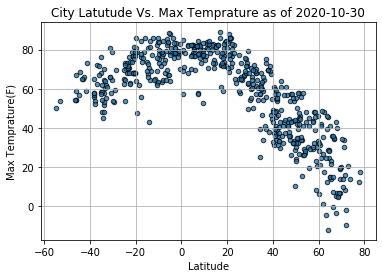

In [100]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Max Temp',marker="o", facecolors="red", edgecolors="black",alpha=0.75)

ax.set_ylabel('Max Temprature(F)')
ax.set_xlabel('Latitude')
label = 'City Latutude Vs. Max Temprature as of ' + date_of_analysis
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/LatvsTemp')

## Latitude vs. Humidity Plot

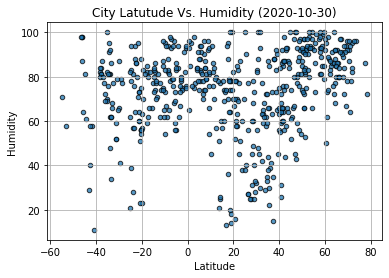

In [101]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Humidity',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Humidity ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvshumidity.png')

## Latitude vs. Cloudiness Plot

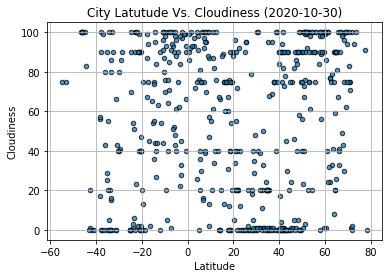

In [102]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Cloudiness',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Cloudiness ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvscloudiness.png')

## Latitude vs. Wind Speed Plot

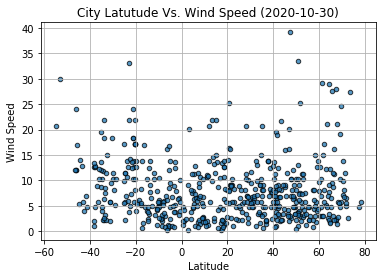

In [103]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Wind Speed',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Wind Speed ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvswindspeed.png')

## Linear Regression

In [104]:
northern_hemi = clean_city_data.loc[clean_city_data.Lat > 0]
northern_hemi.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Provideniya,64.38,-173.30,24.69,88,90,7.78,RU,1604100700
1,10,Bubaque,11.28,-15.83,83.68,76,61,10.71,GW,1604100979
2,13,Butaritari,3.07,172.79,82.56,77,72,20.20,KI,1604100682
3,16,Barrow,71.29,-156.79,15.80,78,1,11.41,US,1604100689
4,17,Salem,11.65,78.17,70.45,70,34,1.34,IN,1604100980
...,...,...,...,...,...,...,...,...,...,...
365,542,Tomatlán,19.93,-105.25,80.67,82,88,2.75,MX,1604101430
366,543,Tianmen,30.65,113.16,60.39,88,100,4.76,CN,1604101430
367,546,Havelock,34.88,-76.90,60.80,59,20,10.29,US,1604101431
368,547,Podor,16.65,-14.96,88.90,13,75,10.58,MR,1604101431


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

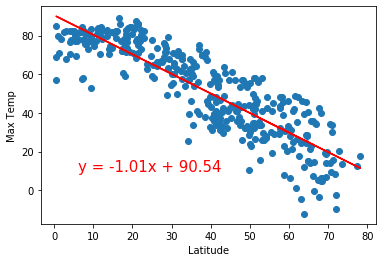

The r-value is: -0.8737408155810775


In [105]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

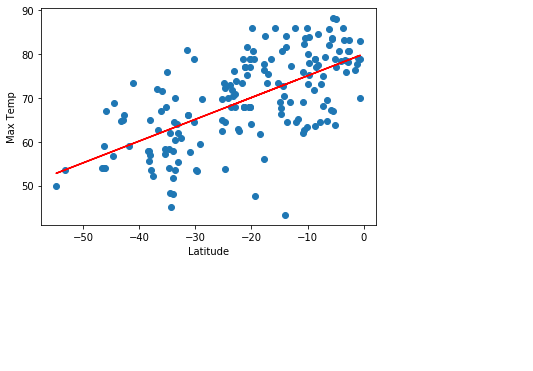

The r-value is: 0.6404577385658441


In [106]:
southern_hemi = clean_city_data.loc[clean_city_data.Lat < 0]
southern_hemi.reset_index()
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

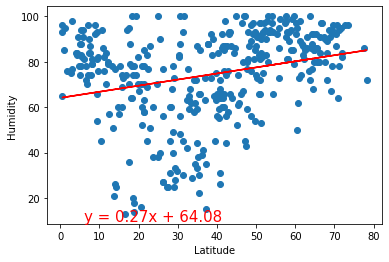

The r-value is: 0.26746441444636737


In [107]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

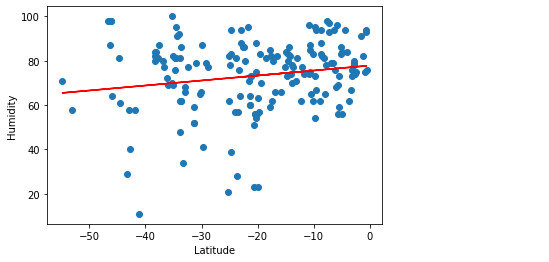

The r-value is: 0.1800674552501712


In [108]:
southern_hemi = clean_city_data.loc[clean_city_data.Lat < 0]
southern_hemi.reset_index()
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

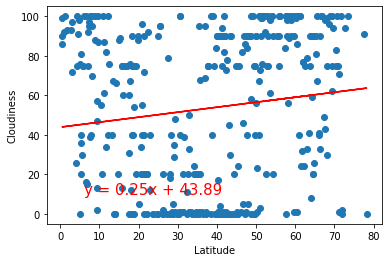

The r-value is: 0.13101090804850785


In [109]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

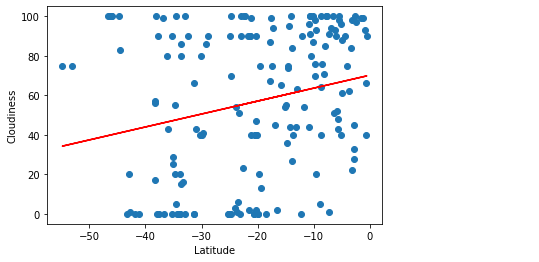

The r-value is: 0.23153352227429014


In [110]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

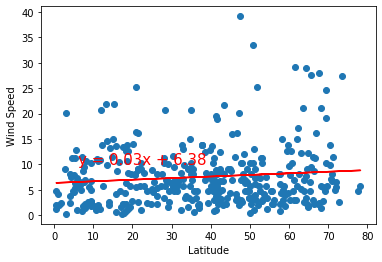

The r-value is: 0.10872778282203098


In [111]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

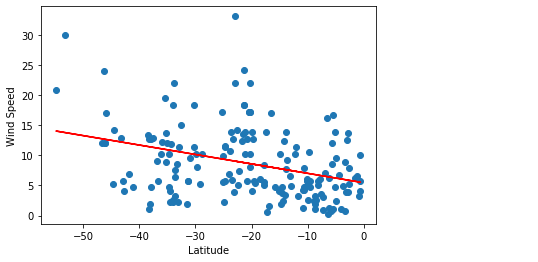

The r-value is: -0.34338730977315546


<Figure size 432x288 with 0 Axes>

In [112]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r-value is: {rvalue}')
plt.savefig('output/')